# **✅IMPORTING**




In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# **✅READ DATA**

In [144]:
df = pd.read_excel(r'C:\Users\Safwa\Downloads\water_potability.xlsx')

# **✅OVERVIEW OF THE WHOLE DATA:**

In [145]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [147]:
df.shape

(3276, 10)

In [148]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## **📌CHECK DUBLICATIES**

In [149]:
df.duplicated().sum()

0

# **✅Data visualizaion**

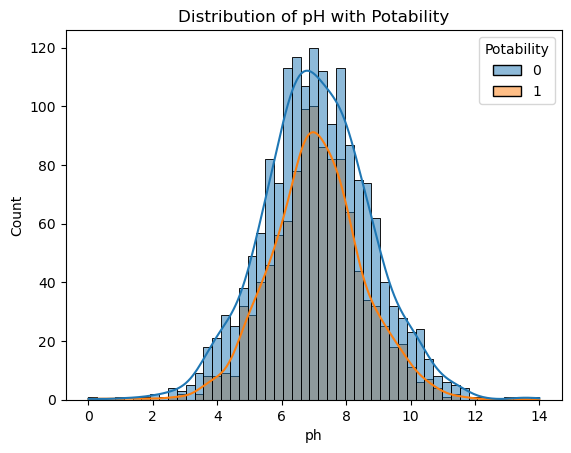

In [150]:
sns.histplot(data=df, x="ph", kde=True, hue="Potability")
plt.title("Distribution of pH with Potability")
plt.show()

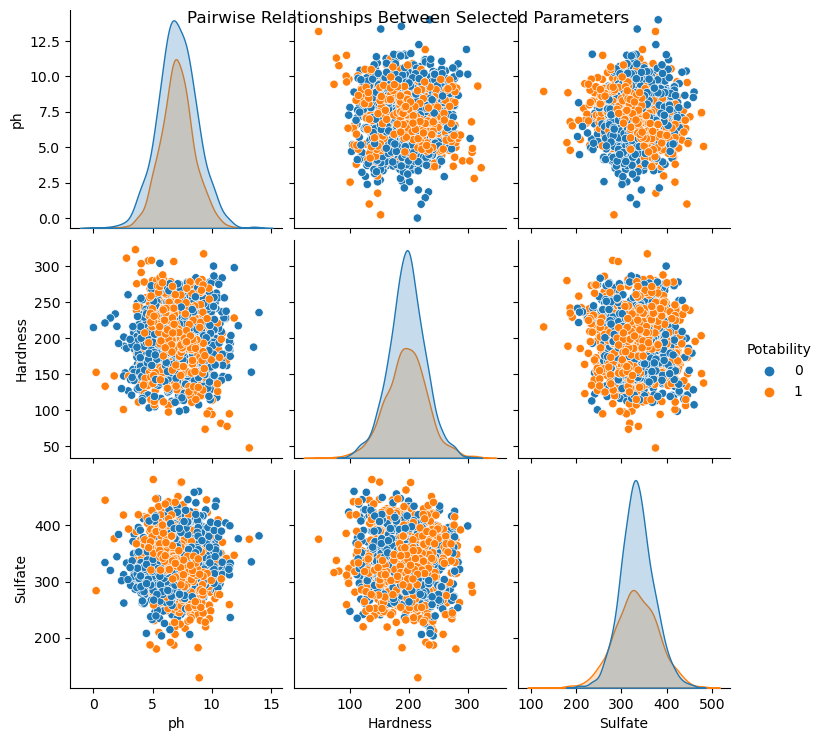

In [151]:
sns.pairplot(df, hue="Potability", vars=['ph', 'Hardness', 'Sulfate'])
plt.suptitle("Pairwise Relationships Between Selected Parameters")
plt.show()


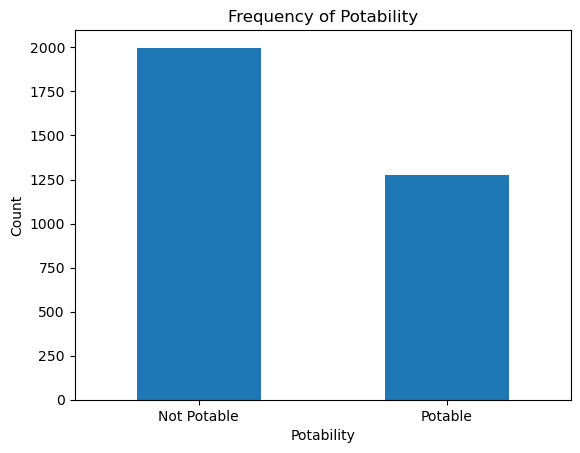

In [152]:
potability_counts = df['Potability'].value_counts()
potability_counts.plot(kind='bar')
plt.title("Frequency of Potability")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not Potable", "Potable"], rotation=0)
plt.show()

<Axes: ylabel='Potability'>

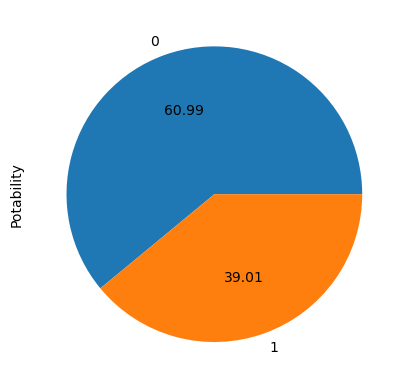

In [153]:
df['Potability'].value_counts().plot.pie(autopct='%.2f')

# **✅Data preprocessing**
## **📌HANDLING OUTLIRES**

In [154]:
columns=columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [155]:
for col in columns:
  df[col]=df[col].abs()

In [156]:
for col in columns:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = (q3 - q1) * 1.5

    # Calculate the bounds for outliers
    lower_bound = q1 - iqr
    upper_bound = q3 + iqr

    # Determine outliers
    lower_outliers = df[df[col] < lower_bound]
    upper_outliers = df[df[col] > upper_bound]
    outliers = len(lower_outliers) + len(upper_outliers)

    df[col] = np.where( df[col] < (q1 - iqr), q1 - iqr,  df[col])
    df[col] = np.where( df[col] > (q3 + iqr), q3 + iqr, df[col])

    print(f"The number of outliers in {col} : {outliers}")


The number of outliers in ph : 0
The number of outliers in Hardness : 83
The number of outliers in Solids : 47
The number of outliers in Chloramines : 61
The number of outliers in Sulfate : 0
The number of outliers in Conductivity : 11
The number of outliers in Organic_carbon : 25
The number of outliers in Trihalomethanes : 0
The number of outliers in Turbidity : 19


## **📌HANDLING NULLS**

In [157]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [158]:
(df.isnull().sum()/df.shape[0])*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [159]:
columns = ['ph', 'Sulfate', 'Trihalomethanes']
for col in columns:
    mean_values = df.groupby('Potability')[col].mean()
    df[col] = df.apply(lambda row: mean_values[row['Potability']] if pd.isnull(row[col]) else row[col], axis=1)

In [160]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## **📌Correlation**

In [161]:
cor1 = df.corr(method='pearson')['Potability']
cor1

ph                -0.003848
Hardness          -0.013360
Solids             0.031847
Chloramines        0.023523
Sulfate           -0.026957
Conductivity      -0.007881
Organic_carbon    -0.029282
Trihalomethanes    0.007305
Turbidity          0.001597
Potability         1.000000
Name: Potability, dtype: float64

<Axes: >

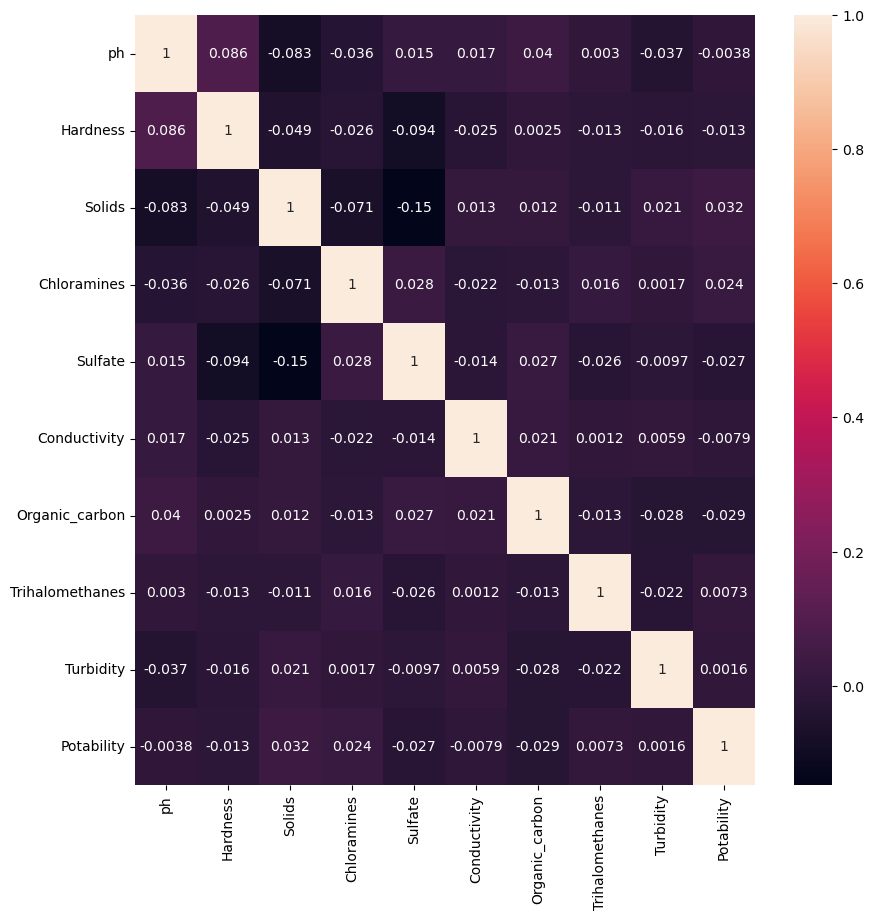

In [162]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),annot = True, ax =ax)

## **📌Scalling**

In [163]:
columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in columns:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
print(df)

            ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     0.003078  0.265461 -0.135691     0.115564  0.961017      1.715401   
1    -2.289378 -2.091993 -0.387249    -0.315144  0.021560      2.070162   
2     0.692826  0.869786 -0.238325     1.395235  0.021560     -0.093403   
3     0.840908  0.561689  0.007136     0.607257  0.639206     -0.780410   
4     1.368526 -0.477657 -0.463030    -0.372561 -0.654379     -0.344116   
...        ...       ...       ...          ...       ...           ...   
3271 -1.641627 -0.084676  2.662484     0.029047  0.723943      1.245089   
3272  0.495329 -0.088691 -0.538591     0.608572 -0.033706     -0.418121   
3273  1.591211 -0.644433  1.303434     0.147963 -0.033706      0.073429   
3274 -1.329556  1.068693 -1.160826    -0.530114 -0.033706     -0.288595   
3275  0.540109 -0.040301 -0.529934     0.250997 -0.033706     -1.224928   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0          -1.187299         1.30618

## **📌Oversampling**

In [164]:
v=df[df['Potability']==1]
b=df[df['Potability']==0]
from sklearn.utils import resample
df=resample(v,replace=True,n_samples=len(b),random_state=42)
df=pd.concat([df,b])
df=df.sample(frac=1, random_state=42)
print(v.shape)
print(b.shape)


(1278, 10)
(1998, 10)


## **📌Split the data**

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
X = df.drop(columns=['Potability'])
y=df['Potability']
X.shape

(3996, 9)

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


# **📌Applying smote algorithm**

In [167]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)
# X_test, y_test = smote.fit_resample(X_test, y_test)

In [168]:
print("Counts of label '1': {}".format(sum(y_train == 1)))
print("Counts of label '0': {}".format(sum(y_train== 0)))

Counts of label '1': 1570
Counts of label '0': 1626


## **📌Logistic Regression**

[[220 152]
 [233 195]]


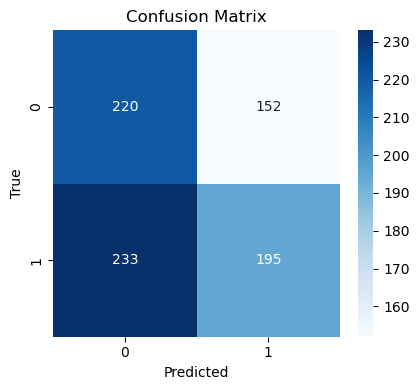

In [169]:
logist = LogisticRegression(random_state = 0)
logist.fit(X_train, y_train)
y_pred = logist.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [170]:
y_predict=logist.predict(X_train)
cr=classification_report(y_train, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.54      0.62      0.58      1626
           1       0.53      0.45      0.49      1570

    accuracy                           0.54      3196
   macro avg       0.54      0.53      0.53      3196
weighted avg       0.54      0.54      0.53      3196



## **📌k nearest neighbor**

In [171]:
from sklearn.neighbors import KNeighborsClassifier
wss=[]
for k in range (3,16,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(X_train,y_train)
    s=knn.score(X_test, y_test)
    wss.append(s)

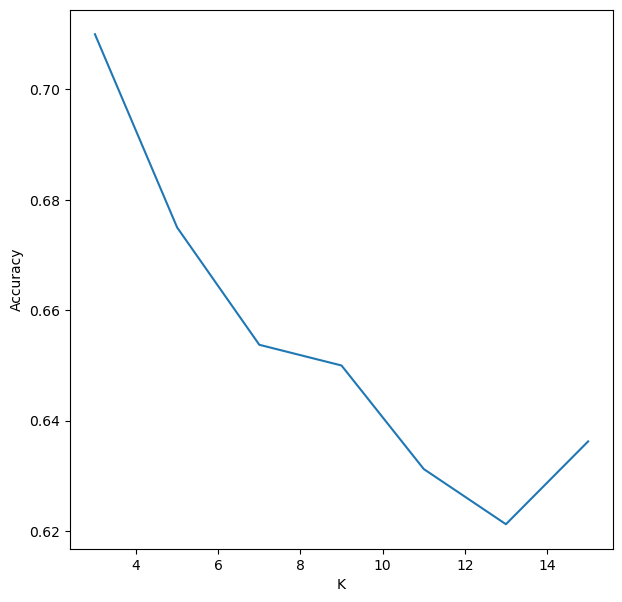

In [172]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(3,16,2),wss)

In [173]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN on test data:", accuracy_knn)

Accuracy of KNN on test data: 0.71


## **📌Decision Tree**

In [174]:
from sklearn.tree import DecisionTreeClassifier
acc1=[]
acc2=[]
for i in range (2,16):
  dtc1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
  dtc1.fit(X_train,y_train)
  dtc2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
  dtc2.fit(X_train,y_train)
  acc1.append(dtc1.score(X_test, y_test))
  acc2.append(dtc2.score(X_test, y_test))

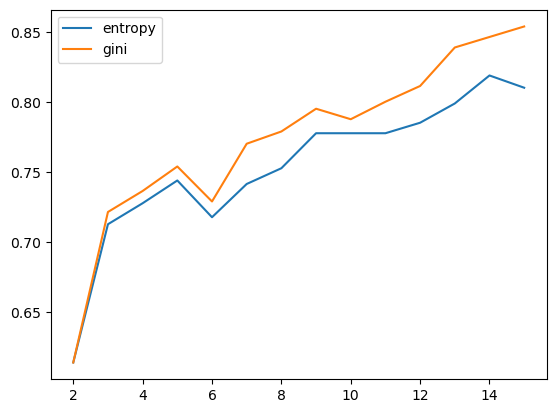

In [175]:
plt.plot(range(2,16),acc1,label="entropy")
plt.plot(range(2,16),acc2,label="gini")
plt.legend()

In [176]:
decisionTree = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state = 42)
decisionTree.fit(X_train, y_train)
print(decisionTree.score(X_test, y_test) * 100)

85.375


## **📌Random Forest**

In [177]:
from sklearn.ensemble import RandomForestClassifier
acc1=[]
acc2=[]
for i in range (2,20):
  rf1=RandomForestClassifier(n_estimators=i,criterion="entropy",random_state=42)
  rf1.fit(X_train,y_train)
  rf2=RandomForestClassifier(n_estimators=i,criterion="gini",random_state=42)
  rf2.fit(X_train,y_train)
  acc1.append(rf1.score(X_test, y_test))
  acc2.append(rf2.score(X_test, y_test))

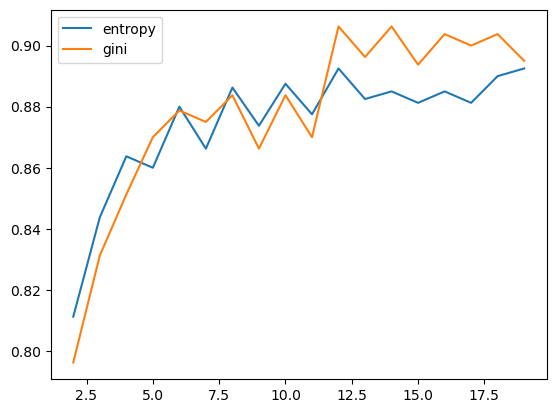

In [178]:
plt.plot(range(2,20),acc1,label="entropy")
plt.plot(range(2,20),acc2,label="gini")
plt.legend()

In [179]:
rf = RandomForestClassifier(n_estimators = 12, criterion = 'gini', random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_test,y_test)*100)

90.625


## **📌Support vector machine**

In [180]:
from sklearn import svm
support=svm.SVC()
support.fit(X_train,y_train)
print(support.score(X_test,y_test)*100)

68.625


## **📌Save the models**

In [181]:
# import joblib
# joblib_file=r"C:\Users\Safwa\Downloads\Ai_project\my__model"
# # Save the model to a file & run it in notebook
# joblib.dump(rf,joblib_file)